# Preicting the categorical diagnisis of Trauma- and stressor-related disorder
## Using the 2020 MH-CLD and the Mental Health Treatment Episode Data Set (MH-TEDS) data found in the Substance ABuse & Mental Health Data Archive (SAMHDA) 
### https://www.datafiles.samhsa.gov/dataset/mental-health-client-level-data-2020-mh-cld-2020-ds0001

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier

# suppress warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
data = pd.read_csv('/Users/jesse/Desktop/School/University of San Diego/ADS 504- Machine Learning/Mental_health.csv')
# Display the first 5 rows
data.head()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2020,14,-9,4,3,1,1,1,1,2,...,0,0,0,1,0,0,1,6,3,20200000001
1,2020,1,2,4,1,1,2,1,2,2,...,0,0,0,0,0,1,1,6,3,20200000002
2,2020,6,-9,4,4,2,2,1,1,2,...,0,0,0,0,0,0,1,6,3,20200000003
3,2020,14,-9,4,3,2,1,1,2,2,...,0,0,0,1,0,0,1,6,3,20200000004
4,2020,13,-9,4,3,2,1,1,1,2,...,0,0,1,1,0,1,1,6,3,20200000005


In [3]:
# Review the size of the dataset
data.shape

(6945521, 40)

In [4]:
# Identify data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945521 entries, 0 to 6945520
Data columns (total 40 columns):
 #   Column       Dtype
---  ------       -----
 0   YEAR         int64
 1   AGE          int64
 2   EDUC         int64
 3   ETHNIC       int64
 4   RACE         int64
 5   GENDER       int64
 6   SPHSERVICE   int64
 7   CMPSERVICE   int64
 8   OPISERVICE   int64
 9   RTCSERVICE   int64
 10  IJSSERVICE   int64
 11  MH1          int64
 12  MH2          int64
 13  MH3          int64
 14  SUB          int64
 15  MARSTAT      int64
 16  SMISED       int64
 17  SAP          int64
 18  EMPLOY       int64
 19  DETNLF       int64
 20  VETERAN      int64
 21  LIVARAG      int64
 22  NUMMHS       int64
 23  TRAUSTREFLG  int64
 24  ANXIETYFLG   int64
 25  ADHDFLG      int64
 26  CONDUCTFLG   int64
 27  DELIRDEMFLG  int64
 28  BIPOLARFLG   int64
 29  DEPRESSFLG   int64
 30  ODDFLG       int64
 31  PDDFLG       int64
 32  PERSONFLG    int64
 33  SCHIZOFLG    int64
 34  ALCSUBFLG    int64

In [5]:
# Count & display the number of missing values in each column
data.isnull().sum()

YEAR           0
AGE            0
EDUC           0
ETHNIC         0
RACE           0
GENDER         0
SPHSERVICE     0
CMPSERVICE     0
OPISERVICE     0
RTCSERVICE     0
IJSSERVICE     0
MH1            0
MH2            0
MH3            0
SUB            0
MARSTAT        0
SMISED         0
SAP            0
EMPLOY         0
DETNLF         0
VETERAN        0
LIVARAG        0
NUMMHS         0
TRAUSTREFLG    0
ANXIETYFLG     0
ADHDFLG        0
CONDUCTFLG     0
DELIRDEMFLG    0
BIPOLARFLG     0
DEPRESSFLG     0
ODDFLG         0
PDDFLG         0
PERSONFLG      0
SCHIZOFLG      0
ALCSUBFLG      0
OTHERDISFLG    0
STATEFIP       0
DIVISION       0
REGION         0
CASEID         0
dtype: int64

In [4]:
# Replace -9 w/ null values as this is indicative of missing data
data = data.replace(-9, np.nan)

# Display results
data.isnull().sum()

YEAR                 0
AGE               4341
EDUC           3713446
ETHNIC          688747
RACE            654635
GENDER           21255
SPHSERVICE           0
CMPSERVICE           0
OPISERVICE           0
RTCSERVICE           0
IJSSERVICE           0
MH1            1016968
MH2            4836795
MH3            6442635
SUB            5887412
MARSTAT        2901556
SMISED          326541
SAP             872993
EMPLOY         4411277
DETNLF         5782308
VETERAN        4336768
LIVARAG        2752026
NUMMHS               0
TRAUSTREFLG          0
ANXIETYFLG           0
ADHDFLG              0
CONDUCTFLG           0
DELIRDEMFLG          0
BIPOLARFLG           0
DEPRESSFLG           0
ODDFLG               0
PDDFLG               0
PERSONFLG            0
SCHIZOFLG            0
ALCSUBFLG            0
OTHERDISFLG          0
STATEFIP             0
DIVISION             0
REGION               0
CASEID               0
dtype: int64

In [7]:
# Isolated for positive TRAUSTREFLG diagnosis
subset_data = data[data['TRAUSTREFLG'] == 1]
grouped_data = subset_data.isnull().any(axis=1).groupby(subset_data.isnull().any(axis=1)).size()

# Create & display DataFrame using the grouped data
pd.DataFrame({'Has Null Values': grouped_data.index, 'Count': grouped_data.values})

,Has Null Values,Count
0,False,5955
1,True,1289266


In [8]:
# Create a new column 'Has_Multiple_Flags' to check if a row has more than one 1 value
data['Has_Multiple_Flags'] = data[['ANXIETYFLG', 'DEPRESSFLG', 'TRAUSTREFLG', 'ALCSUBFLG', 'BIPOLARFLG']].sum(axis=1) > 1

# Filter rows where 'Has_Multiple_Flags' is True
rows_with_multiple_flags = data[data['Has_Multiple_Flags']]

# Count the occurrences of each value in the 'Has_Multiple_Flags' column
flags_counts = data['Has_Multiple_Flags'].value_counts()

# Print the count of rows with 1 value in 1, 2, 3, or more columns
print('Rows with 1 value in 1 column:', flags_counts[False])
print('Rows with 1 value in 2 columns:', flags_counts[True])

if True in flags_counts.index:
    print('Rows with 1 value in 3 columns:', flags_counts.loc[False] - flags_counts[True])
    print('Rows with 1 value in 4 or more columns:', flags_counts[2:].sum())
else:
    print('Rows with 1 value in 3 columns: 0')
    print('Rows with 1 value in 4 or more columns: 0')

Rows with 1 value in 1 column: 5806030
Rows with 1 value in 2 columns: 1139491
Rows with 1 value in 3 columns: 4666539
Rows with 1 value in 4 or more columns: 0


In [9]:
# Get the counts for the distribution of each column for rows with 1 value in 2 or more columns
column_distribution = rows_with_multiple_flags[['ANXIETYFLG', 'DEPRESSFLG', 'TRAUSTREFLG', 'ALCSUBFLG', 'BIPOLARFLG']].apply(pd.Series.value_counts)

# Print the counts for the distribution of each column for rows with 1 value in 2 or more columns
column_distribution

,ANXIETYFLG,DEPRESSFLG,TRAUSTREFLG,ALCSUBFLG,BIPOLARFLG
0,391923,379942,677135,958425,871364
1,747568,759549,462356,181066,268127


In [10]:
# Prior to determining ideal way to handle null values, I calculated the what would be the number of observations remaining if all null values are removed
null_removal = data.dropna(axis=0, how='any')

# Isolate rows with TRAUSTREFLG equal to 0 or 1
subset_data = data[data['TRAUSTREFLG'].isin([0, 1])]

# Count the occurrences of each value in TRAUSTREFLG
count_data = subset_data['TRAUSTREFLG'].value_counts().reset_index()

# Rename the columns for clarity
count_data.columns = ['TRAUSTREFLG', 'Count']

# Display the DataFrame
count_data

,TRAUSTREFLG,Count
0,0,5650300
1,1,1295221


In [11]:
# In this instance, I will remove the null value and not use alternative approaches to fill due to the size of the subset will still be insightful & is relatively balanced
df = null_removal.copy()

# Get the updated dimensions of the data subset
df.shape

(13046, 41)

### Data Visualization

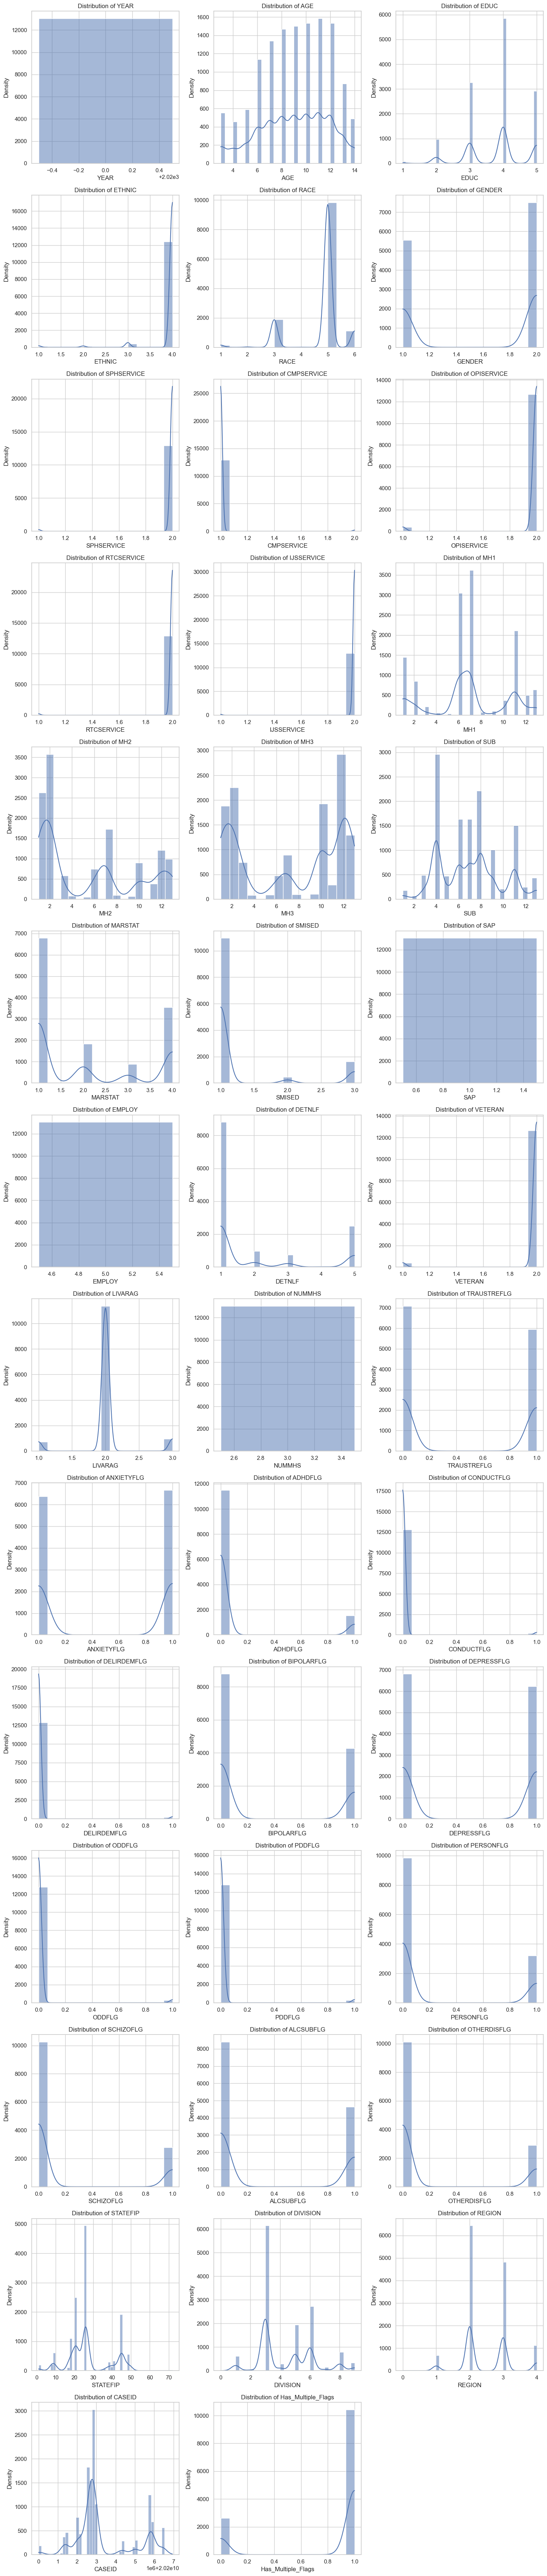

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define the number of columns per row in the mosaic
columns_per_row = 3

# Calculate the number of rows needed for the mosaic
num_rows = (len(df.columns) + columns_per_row - 1) // columns_per_row

# Create the mosaic plot using subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5*num_rows))
for i, column in enumerate(df.columns):
    row = i // columns_per_row
    col = i % columns_per_row
    sns.histplot(df[column], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f"Distribution of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Density")

# Remove any empty subplots
for i in range(len(df.columns), num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

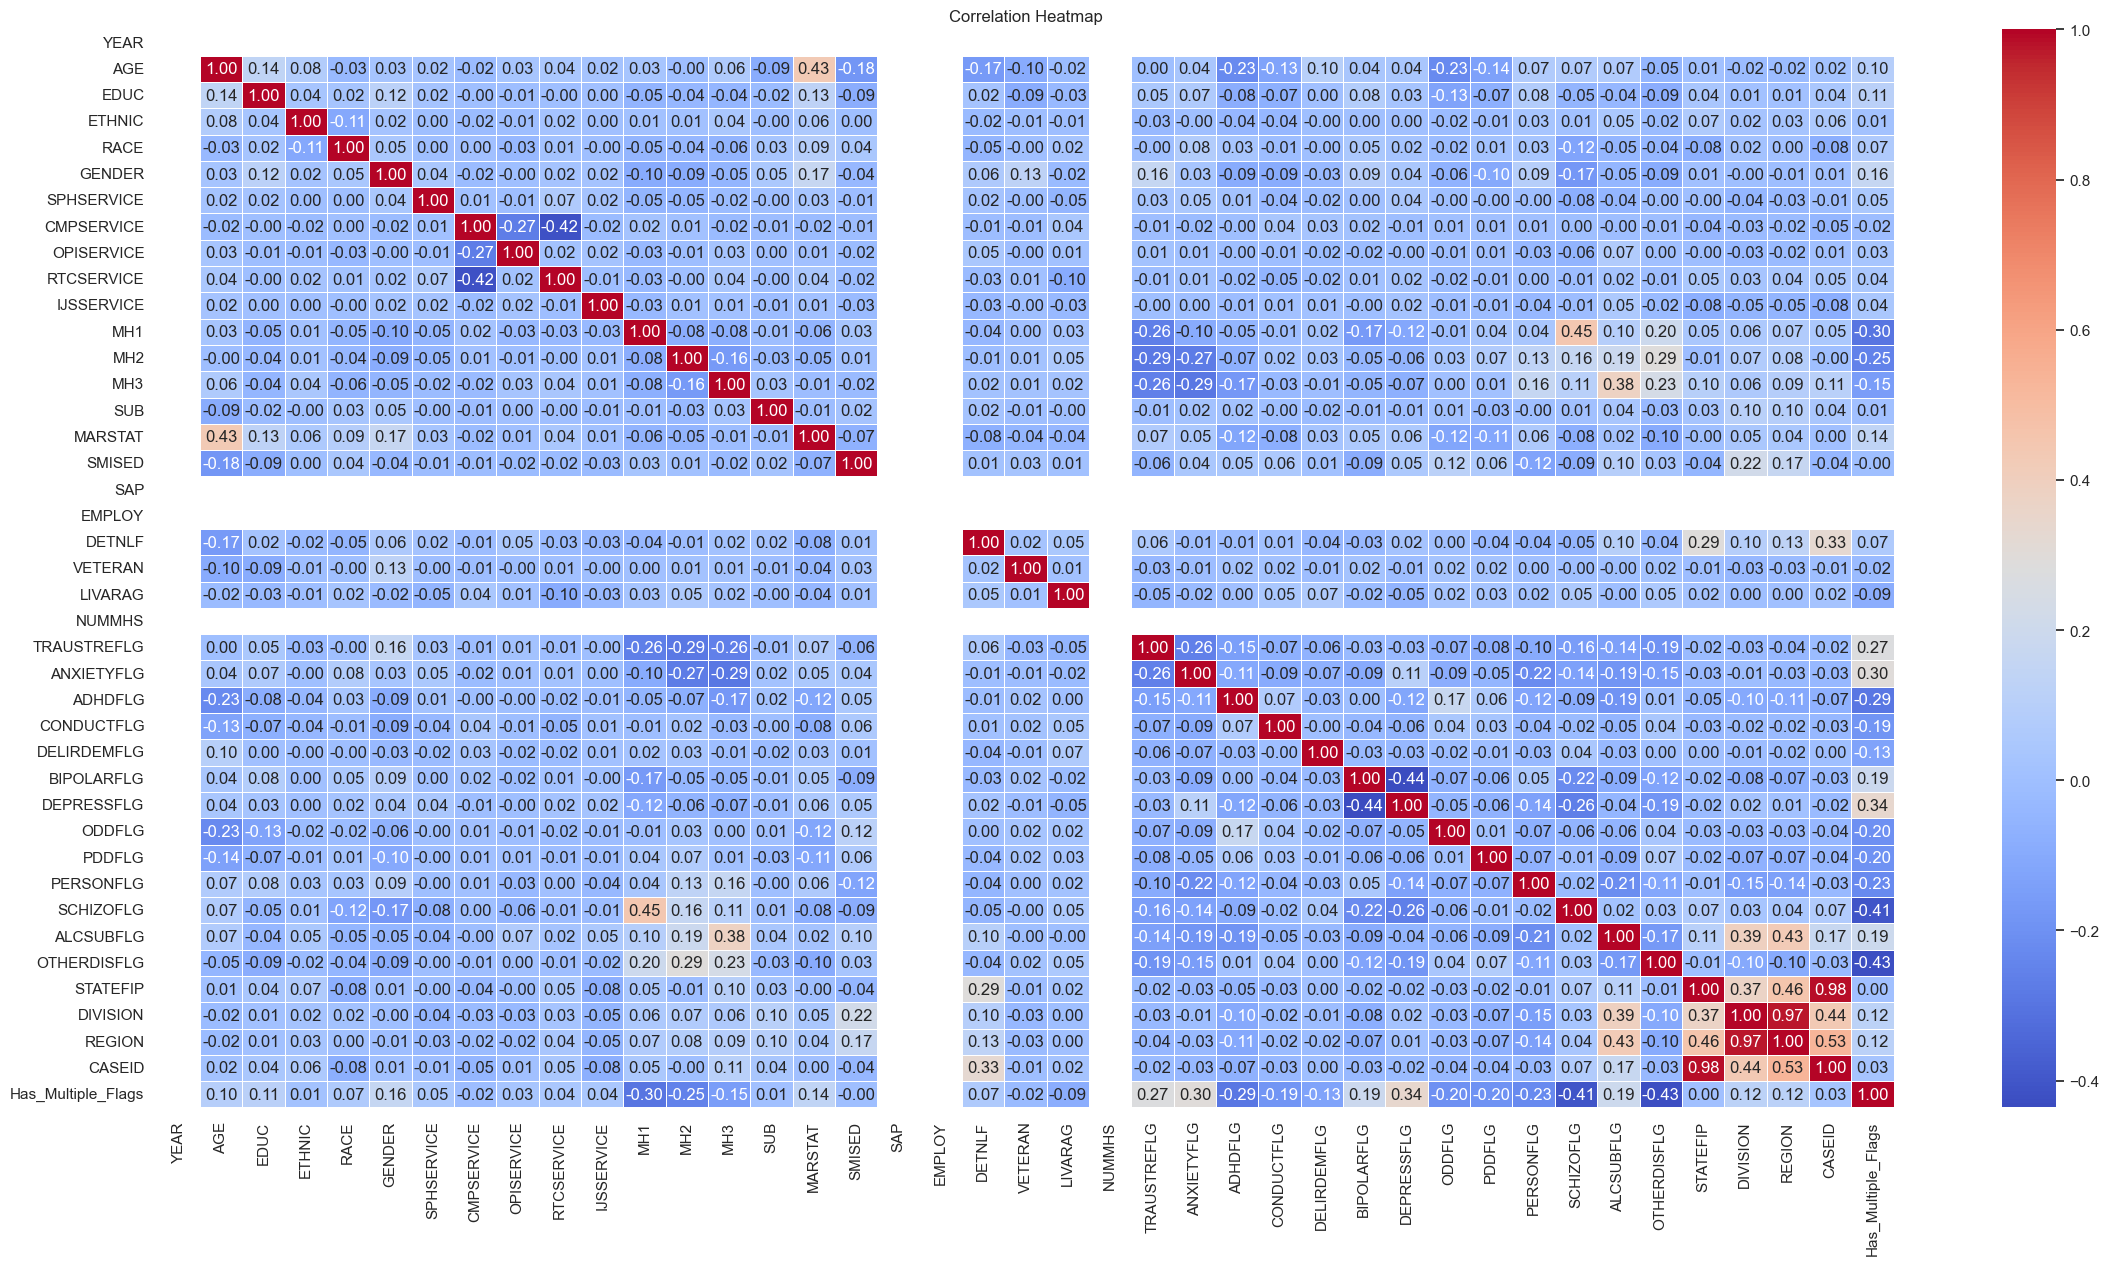

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the style for the heatmap
sns.set(style="white")

# Create a correlation heatmap using seaborn
plt.figure(figsize=(28, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Find if there are any columns correlated w/ TRAUSTREFLG
df.corr()['TRAUSTREFLG']

YEAR                       NaN
AGE                   0.000204
EDUC                  0.049198
ETHNIC               -0.027251
RACE                 -0.000765
GENDER                0.161034
SPHSERVICE            0.026115
CMPSERVICE           -0.006434
OPISERVICE            0.013975
RTCSERVICE           -0.008562
IJSSERVICE           -0.001558
MH1                  -0.264760
MH2                  -0.285044
MH3                  -0.259959
SUB                  -0.008361
MARSTAT               0.070208
SMISED               -0.056292
SAP                        NaN
EMPLOY                     NaN
DETNLF                0.055895
VETERAN              -0.033460
LIVARAG              -0.051801
NUMMHS                     NaN
TRAUSTREFLG           1.000000
ANXIETYFLG           -0.258450
ADHDFLG              -0.145813
CONDUCTFLG           -0.074604
DELIRDEMFLG          -0.064815
BIPOLARFLG           -0.025463
DEPRESSFLG           -0.031771
ODDFLG               -0.070144
PDDFLG               -0.084463
PERSONFL

## Data Pre-Processing

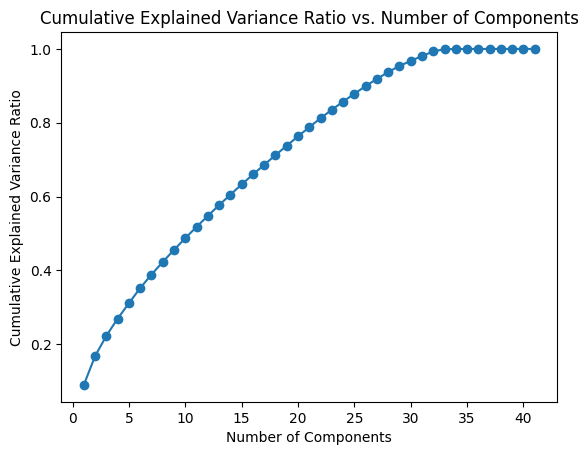

In [12]:
# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(df_standardized)

# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.show()

In [26]:
# Find the number of components that fall within 80% to 90% cumulative explained variance
target_variance_range = (0.80, 0.90)
target_components = np.where((explained_variance_ratio_cumulative >= target_variance_range[0]) &
                             (explained_variance_ratio_cumulative <= target_variance_range[1]))[0][0] + 1

print("Ideal number of components within 80% to 90% variance range:", target_components)

Ideal number of components within 80% to 90% variance range: 22


In [13]:
# Speciffy the columns to drop
columns_to_drop = ['CASEID', 'Has_Multiple_Flags']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Split the dataset to predict TRAUSTREFLG
X = df.drop('TRAUSTREFLG', axis=1)
y = df['TRAUSTREFLG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the train & test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 22 components
n_components = 22
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the dimensions of X_train_pca and X_test_pca
print("Dimensions of X_train_pca:", X_train_pca.shape)
print("Dimensions of X_test_pca:", X_test_pca.shape)

Dimensions of X_train_pca: (10436, 22)
Dimensions of X_test_pca: (2610, 22)


In [47]:
X_train.columns

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG',
       'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG',
       'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP',
       'DIVISION', 'REGION'],
      dtype='object')

In [28]:
# Build and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity, sensitivity, and F1 score
tn, fp, fn, tp = cm.ravel()

logreg_specificity = tn / (tn + fp)
logreg_sensitivity = tp / (tp + fn)
logreg_f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Specificity:", logreg_specificity)
print("Sensitivity (Recall):", logreg_sensitivity)
print("F1 Score:", logreg_f1)

Confusion Matrix:
[[936 460]
 [505 709]]
Specificity: 0.670487106017192
Sensitivity (Recall): 0.5840197693574959
F1 Score: 0.595048258497692


In [30]:
# Build and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity, sensitivity, and F1 score
tn, fp, fn, tp = cm.ravel()

rf_specificity = tn / (tn + fp)
rf_sensitivity = tp / (tp + fn)
rf_f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Specificity:", rf_specificity)
print("Sensitivity (Recall):", rf_sensitivity)
print("F1 Score:", rf_f1) 

Confusion Matrix:
[[1264  132]
 [ 278  936]]
Specificity: 0.9054441260744985
Sensitivity (Recall): 0.771004942339374
F1 Score: 0.8203330411919368


In [32]:
# Build and fit the SVM classifier with PCA-transformed data
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity, sensitivity (recall), and F1 score
tn, fp, fn, tp = cm.ravel()

svm_specificity = tn / (tn + fp)
svm_sensitivity = tp / (tp + fn)
svm_f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_sensitivity)
print("F1 Score:", svm_f1)

Confusion Matrix:
[[1246  150]
 [ 149 1065]]
Specificity: 0.8925501432664756
Sensitivity (Recall): 0.8772652388797364
F1 Score: 0.8769040757513381


In [35]:
# Build and fit the Gradient Boosting classifier with PCA-transformed data
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity, sensitivity (recall), and F1 score
tn, fp, fn, tp = cm.ravel()

gb_specificity = tn / (tn + fp)
gb_sensitivity = tp / (tp + fn)
gb_f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Specificity:", gb_specificity)
print("Sensitivity (Recall):", gb_sensitivity)
print("F1 Score:", gb_f1)

Confusion Matrix:
[[1117  279]
 [ 340  874]]
Specificity: 0.8001432664756447
Sensitivity (Recall): 0.7199341021416804
F1 Score: 0.7384875369666244


In [36]:
# Create the neural network model
nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                             learning_rate_init=0.001, random_state=42)

# Fit the model to the training data
nn_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = nn_classifier.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity, sensitivity (recall), and F1 score
tn, fp, fn, tp = cm.ravel()

nn_specificity = tn / (tn + fp)
nn_sensitivity = tp / (tp + fn)
nn_f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Specificity:", nn_specificity)
print("Sensitivity (Recall):", nn_sensitivity)
print("F1 Score:", nn_f1)

Confusion Matrix:
[[1380   16]
 [  23 1191]]
Specificity: 0.9885386819484241
Sensitivity (Recall): 0.9810543657331137
F1 Score: 0.9838909541511773


In [37]:
# Create the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) here

# Fit the model to the training data
knn_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity, sensitivity (recall), and F1 score
tn, fp, fn, tp = cm.ravel()

knn_specificity = tn / (tn + fp)
knn_sensitivity = tp / (tp + fn)
knn_f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_sensitivity)
print("F1 Score:", knn_f1)

Confusion Matrix:
[[1200  196]
 [ 248  966]]
Specificity: 0.8595988538681948
Sensitivity (Recall): 0.7957166392092258
F1 Score: 0.8131313131313131


In [39]:
# Create a dictionary w/ the model names& their performance metrics
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting', 'Neural Network', 'KNN'],
    'Specificity': [logreg_specificity, rf_specificity, svm_specificity, gb_specificity, nn_specificity, knn_specificity],
    'Sensitivity': [logreg_sensitivity, rf_sensitivity, svm_sensitivity, gb_sensitivity, nn_sensitivity, knn_sensitivity],
    'F1 Score': [logreg_f1, rf_f1, svm_f1, gb_f1, nn_f1, knn_f1]
}

# Convert into a data frame
accuracy_df = pd.DataFrame(metrics)

# Sort accuracy_df by F1 Score in descending order
accuracy_df = accuracy_df.sort_values(by='F1 Score', ascending=False)

# Display results
accuracy_df

,Model,Specificity,Sensitivity,F1 Score
4,Neural Network,0.988539,0.981054,0.983891
2,Support Vector Machine,0.892550,0.877265,0.876904
1,Random Forest,0.905444,0.771005,0.820333
5,KNN,0.859599,0.795717,0.813131
3,Gradient Boosting,0.800143,0.719934,0.738488
0,Logistic Regression,0.670487,0.584020,0.595048


### Even though specificity is a critical performance metric to evaluate the model's performance, great importance should also be made on correctly predicting true negatives. The Neural Network model was the most successful model across all metrics including the specificty, sensitivity, and F1 score.